# EP17B009 Srijan Gupta
# EE4140: Digital Communication Systems
# Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

---
# Question 1

In [2]:
#Define the raised cosine pulse shaping filter
def pulse_shape_filter(beta, L, J):
    n = np.arange(-L*J,L*J+1)
    g_n = np.zeros(len(n))
    
    #If beta = 0, it is simply sinc()
    if beta == 0:
            g_n = np.sinc(n/J)
            
    else:
        for i in range(len(n)):
            #The case where denominator becomes zero, define as follows
            if (2*beta*(n[i]/J))**2 == 1:
                g_n[i] = np.sinc(n[i]/J)*(np.pi/4)
                
            else:
                g_n[i] = np.sinc(n[i]/J)*(np.cos(np.pi*beta*n[i]/J)/(1 - (2*beta*(n[i]/J))**2))
        
    return g_n

#Function to pad the input with zeros
def pad_input(I_k, J):
    pad_size = J-1
    initial_size = len(I_k)
    final_size = initial_size + pad_size*initial_size
    I_padded_n = np.zeros(final_size) #Create an array of required length of zeros
    I_padded_n[::J] = I_k #Place the original input values at spacings of 'J'
    return I_padded_n

In [3]:
#Define the input
I_k = np.random.randint(0,2,size=16)*2-1

## (a)

In [4]:
J = 4
L = 2
beta = 0

I_padded1_n = pad_input(I_k, J)
n_I1 = np.array(range(len(I_padded1_n)))

g1_n = pulse_shape_filter(beta, L, J)

#Get the output by convolving
x1_n = np.convolve(I_padded1_n, g1_n)

#Since g[n] is from -L*J to L*J and input starts from 0,
#the first sample of the output corrresponds to g[n-(-L*J)] which is from -2L*J to 0,
#hence the first sample of the output is at n = -L*J, so defined accordingly:
n_x1 = np.array(range(len(x1_n))) - L*J

## (b)

In [5]:
J = 4
L = 4
beta = 0

g2_n = pulse_shape_filter(beta, L, J)

x2_n = np.convolve(I_padded1_n, g2_n)
n_x2 = np.array(range(len(x2_n))) - L*J

### Figure 1.1

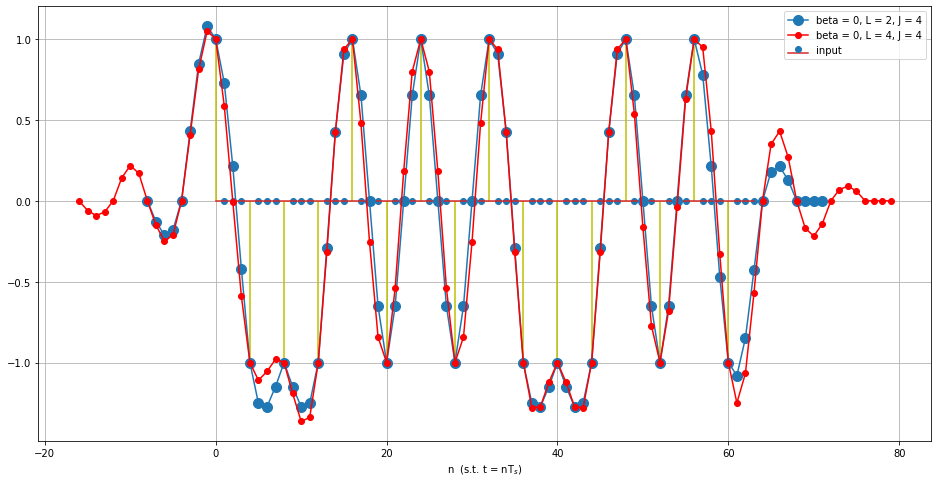

In [6]:
plt.figure(figsize=(16,8))
plt.stem(n_I1, I_padded1_n,'y',use_line_collection = True,label='input')
plt.plot(n_x1, x1_n,'-o',markersize=10,label='beta = 0, L = 2, J = 4')
plt.plot(n_x2, x2_n,'-ro',label='beta = 0, L = 4, J = 4')
plt.legend()
plt.xlabel('n  (s.t. t = nT$_s$)')
plt.grid()
plt.show()

### Comments:

The response from both the cases is almost similar.

## (c)

In [7]:
J = 8
L = 2
beta = np.array([0,0.5,1])

I_padded2_n = pad_input(I_k, J)
n_I2 = np.array(range(len(I_padded2_n)))

g3_n_arr = np.array([ pulse_shape_filter(b, L, J) for b in beta])
x3_n_arr = np.array([ np.convolve(I_padded2_n, g) for g in g3_n_arr])
n_x3 = np.array(range(len(x3_n_arr[0]))) - L*J

### Figure 1.2

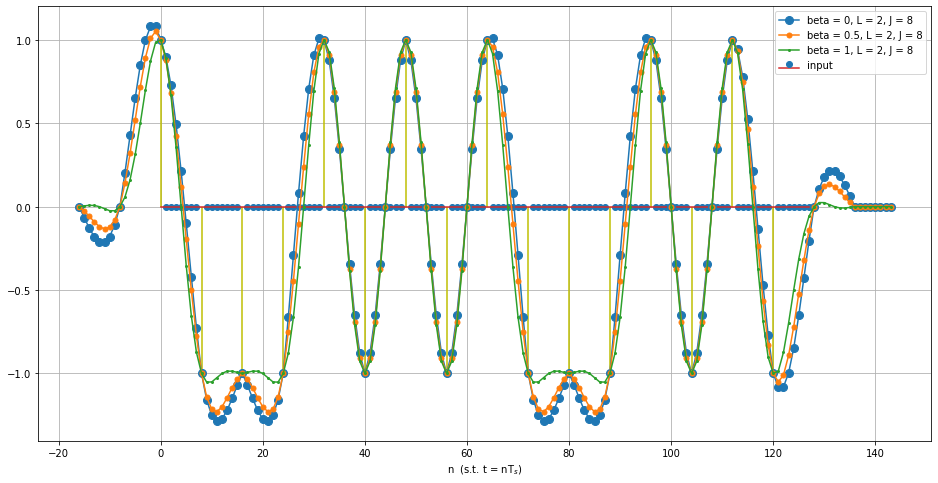

In [8]:
plt.figure(figsize=(16,8))
plt.stem(n_I2, I_padded2_n,'y',use_line_collection = True,label='input')
plt.plot(n_x3, x3_n_arr[0],'-o',markersize=8,label='beta = 0, L = 2, J = 8')
plt.plot(n_x3, x3_n_arr[1],'-o',markersize=5,label='beta = 0.5, L = 2, J = 8')
plt.plot(n_x3, x3_n_arr[2],'-o',markersize=2,label='beta = 1, L = 2, J = 8')
plt.legend()
plt.xlabel('n  (s.t. t = nT$_s$)')
plt.grid()
plt.show()

### Comments:

As $\beta$ increases, g[n] falls off faster with n, thus upon convolving the input with it, there is lesser interference from other bits for larger $\beta$, and thus there is less overshoot in between the bits.

# Question 2

In [9]:
N0_arr = np.logspace(0,-1,6) #The noise variance array
Eb_by_N0_dB = 10*np.log10(1/N0_arr)

## (a)

### Probability of symbol error for BPSK:
We have $E_b = 1$. Since in BPSK, each symbol has just one bit, the average symbol energy $E_s = E_b = 1$. Also, since all the symbols are equidistant from origin (i.e. have same energy), their energy $ = E_s$. Hence, the distance from origin for each symbol, $d = 1$. Say the variance of noise is $N_0$.

Let,
$$q = \frac{1}{2}\text{erfc}\left(\frac{d}{\sqrt{2N_0}}\right) = \frac{1}{2}\text{erfc}\left(\frac{1}{\sqrt{2N_0}}\right)$$
Thus, the probability of symbol error (assuming all symbols are equally likely) is,
$$P(e) = P_s = q\tag{2.1}$$

### Probability of symbol error for QPSK:
Here also, the energy of each symbol is equal, and thus equal to the average energy $E_s$. And since the number of bits per symbol is $2$, $E_s = 2E_b = 2$. Thus the distance of the symbols from origin, $d = \sqrt{2}$. Say the variance of noise per dimension is $N_0/2$.

Let
$$q = \frac{1}{2}\text{erfc}\left(\frac{d_x(=d_y)}{\sqrt{N_0}}\right) = \frac{1}{2}\text{erfc}\left(\frac{1}{\sqrt{N_0}}\right)$$
The probability that the $(x,y)$ coordinates of a symbol transmitted as $(1,1)$ are positive, is $(1-q)^2$.

Hence, the probability of symbol error (assuming all symbols are equally likely) is,
$$
\begin{align}
P(e) = P_s &= 1 - (1-q)^2\\
&= 2q - q^2\tag{2.2}
\end{align}$$

### Probability of symbol error for 16-QAM:
Say the $x$ and $y$ coordinates of the symbols are $\{-3d,-d,d,3d\}$. Thus, average symbol energy, $E_s = \frac{1}{4}(2 + 2\times10 + 18)d^2 = 10d^2$. $E_s$ is also equal to $4E_b = 4$ (since there are four bits per symbol). Hence, $d = \sqrt{0.4}$

Let
$$q = \frac{1}{2}\text{erfc}\left(\frac{d}{\sqrt{N_0}}\right) = \frac{1}{2}\text{erfc}\left(\frac{\sqrt{0.4}}{\sqrt{N_0}}\right)$$

The probability of correct decision for the $(1d,1d)$ type symbols, say type $I$, is $(1-2q)^2$, and there are $4$ of them. For the $(3d,1d)$ type symbols, say type $II$, it is $(1-q)(1-2q)$ and there are $8$ of them. And lastly, for the $(3d,3d)$ type symbols, say type $III$, it is $(1-q)^2$ and there are 4 of them.

Hence, the probability of symbol error (assuming all symbols are equally likely) is,
$$
\begin{align}
P(e) = P_s &= 1 - \left(\frac{1}{4}(1-2q)^2 + \frac{1}{2}(1-q)(1-2q) + \frac{1}{4}(1-q)^2\right)\\
&= \frac{1}{4}(4q - 4q^2) + \frac{1}{2}(3q - 2q^2) + \frac{1}{4}(2q - q^2)\\
&= 3q - 2.25q^2\tag{2.3}
\end{align}
$$

In [10]:
#Function definition for calculating theoretical P_s for BPSK
def BPSK_probab_symb_err(N0_arr):
    d = 1
    q_arr = 0.5*special.erfc(d*(2*N0_arr)**-0.5)
    Ps_arr = q_arr
    return Ps_arr

#Function definition for calculating theoretical P_s for QPSK
def QPSK_probab_symb_err(N0_arr):
    dx = 1
    q_arr = 0.5*special.erfc(dx*(N0_arr)**-0.5)
    Ps_arr = 1 - (1-q_arr)**2 
    return Ps_arr

#Function definition for calculating theoretical P_s for 16-QAM
def QAM16_probab_symb_err(N0_arr):
    dx = (0.4)**0.5
    q_arr = 0.5*special.erfc(dx*(N0_arr)**-0.5)
    Ps1_arr = 1 - (1-2*q_arr)**2
    Ps2_arr = 1 - (1-q_arr)*(1-2*q_arr)
    Ps3_arr = 1 - (1-q_arr)**2
    Ps_arr = (Ps1_arr + 2*Ps2_arr + Ps3_arr)/4
    return Ps_arr

## Figure 2.1

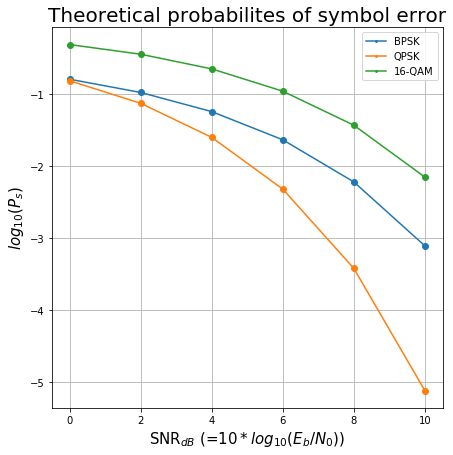

In [11]:
plt.figure(figsize=(7,7))
plt.plot(Eb_by_N0_dB, np.log10(BPSK_probab_symb_err(N0_arr)),'-o',label='BPSK')
plt.plot(Eb_by_N0_dB, np.log10(QPSK_probab_symb_err(N0_arr)),'-o',label='QPSK')
plt.plot(Eb_by_N0_dB, np.log10(QAM16_probab_symb_err(N0_arr)),'-o',label='16-QAM')
plt.legend(markerscale=0.3)
plt.title('Theoretical probabilites of symbol error',size=20)
plt.xlabel('SNR$_{dB}$ (=$10*log_{10}(E_b/N_0)$)',size=15)
plt.ylabel('$log_{10}(P_s)$',size=15)
plt.grid()
plt.show()

## (b)

### Bounds on probability of symbol error for QPSK:
- **Union bound using all pairwise symbol errors:**
$$P_{s,12} = P_{s,14} = \frac{1}{2}\text{erfc}\left(\frac{1}{\sqrt{N_0}}\right) = q$$
$$P_{s,13} = 1 - \frac{1}{2}\text{erfc}\left(\frac{\sqrt{2}}{\sqrt{N_0}}\right) = q'$$
Hence,
$$\boxed{
\begin{align}
P_{s,ub,all} &= 2P_{s,12} + P_{s,13}\\
&= 2q+q'
\end{align}}\tag{2.4}$$
- **Union bound using nearest neighbors:**
$$\boxed{
\begin{align}
P_{s,ub,NN} &= 2P_{s,12}\\
&= 2q
\end{align}}\tag{2.5}$$
- **Union bound using nearest neighbors, Chernoff bound:**
$$q_{ch} = e^{-\frac{1}{N_0}}$$
$$\boxed{
\begin{align}
P_{s,ub,NN,ch} = 2q_{ch}
\end{align}}\tag{2.5}$$

In [12]:
#Function definition for calculating bounds on P_s for QPSK
def QPSK_union_bound(N0_arr):
    d12 = 1
    d13 = 2**0.5
    q12_arr = 0.5*special.erfc(d12*(N0_arr)**-0.5)
    q13_arr = 0.5*special.erfc(d13*(N0_arr)**-0.5)
    Ps12_arr = q12_arr
    Ps13_arr = q13_arr
    Ps_ub_all = 2*Ps12_arr + Ps13_arr
    Ps_ub_NN = 2*Ps12_arr
    
    Ps12_chernoff_arr = np.exp(-(N0_arr)**-1)
    Ps_ub_NN_chernoff = 2*Ps12_chernoff_arr
    return np.array([Ps_ub_all, Ps_ub_NN, Ps_ub_NN_chernoff])

## (c)
### Monte Carlo simulation for QPSK

In [27]:
num_sym = int(1e5) #No. of symbols

#'num_sym' instances of the two uniform rv's:
unif_rv_vals_x = np.random.uniform(0,1,num_sym )
unif_rv_vals_y = np.random.uniform(0,1,num_sym )

#Mapping the rv instances to symbols
sym_x_trans = np.array([ -1 if x < 0.5 else 1 for x in unif_rv_vals_x]) # x dimension
sym_y_trans = np.array([ -1 if y < 0.5 else 1 for y in unif_rv_vals_y]) # y dimension

#The array with the symbols to be transmitted
sym_trans = np.array([sym_x_trans,sym_y_trans]).T #shape = num_sym*2

#Mean of noise:
noise_mean = np.array([0, 0])

#Covariance matrices for noise, shape = len(N0_arr)*2*2 = 6*2*2
noise_cov_arr = np.tensordot(N0_arr/2,np.identity(2),axes=0)

#The array to store the various noise values, shape = 6*num_sym*2
channel_noise_arr = np.zeros((len(N0_arr),num_sym ,2)) #shape = 
for i in range(len(N0_arr)):
    channel_noise_arr[i] = np.random.multivariate_normal(noise_mean,noise_cov_arr[i],num_sym) #Sampling from 2d normal distribution

#Received symbols = transmitted + noise
sym_rec_arr = sym_trans + channel_noise_arr

#Can be uncommented to plot transmitted and received symbols:
#plt.figure(figsize=(7,7))
#plt.plot(sym_rec_arr[5,:,0],sym_rec_arr[5,:,1],'.',markersize=1)
#plt.plot(sym_trans[:,0],sym_trans[:,1],'.',markersize=10)
#plt.show()

#Array to store the decided symbols from the received ones:
sym_dec_arr = np.zeros(np.shape(sym_rec_arr)) #shape = 6*num_sym*2

#If point in 1st quadrant, map to (1,1)
sym_dec_arr[(sym_rec_arr[:,:,0]>=0)&(sym_rec_arr[:,:,1]>=0)] = np.array([ 1, 1])

#If point in 4th quad, map to (1,-1)
sym_dec_arr[(sym_rec_arr[:,:,0]>=0)&(sym_rec_arr[:,:,1]< 0)] = np.array([ 1,-1])

#If point in 2nd quad, map to (-1,1)
sym_dec_arr[(sym_rec_arr[:,:,0]< 0)&(sym_rec_arr[:,:,1]>=0)] = np.array([-1, 1])

#If point in 3rd quad, map to (-1,-1)
sym_dec_arr[(sym_rec_arr[:,:,0]< 0)&(sym_rec_arr[:,:,1]< 0)] = np.array([-1,-1])

#SER = 1 - (no. of correctlt decoded symbols)/total no. of symbols
# np.all() along axis 2 does AND on the x and y value to check if both are equal to the ones that were trnsmitted
SER_arr = 1 - np.count_nonzero(np.all(sym_dec_arr==sym_trans,axis=2),axis=1)/num_sym
print('SER_arr = ',SER_arr)

SER_arr =  [1.502e-01 7.345e-02 2.500e-02 4.900e-03 3.400e-04 1.000e-05]


## Figure 2.2

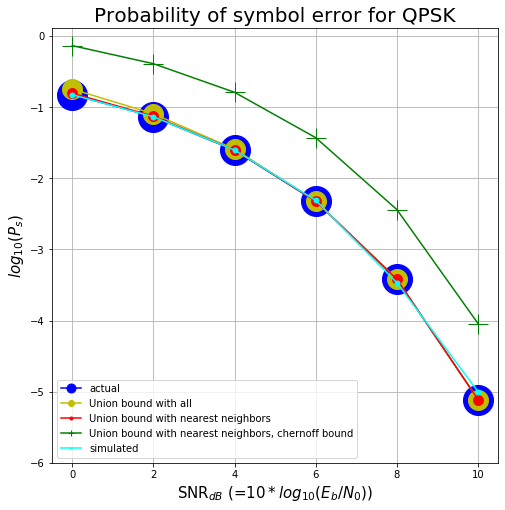

In [28]:
QPSK_Ps_actual_log = np.log10(QPSK_probab_symb_err(N0_arr))
QPSK_Ps_ub_log = np.log10(QPSK_union_bound(N0_arr))

plt.figure(2,figsize=(8,8))
plt.plot(Eb_by_N0_dB, QPSK_Ps_actual_log,'-bo',markersize=30,label='actual')
plt.plot(Eb_by_N0_dB, QPSK_Ps_ub_log[0],'-yo',markersize=20,label='Union bound with all')
plt.plot(Eb_by_N0_dB, QPSK_Ps_ub_log[1],'-ro',markersize=10,label='Union bound with nearest neighbors')
plt.plot(Eb_by_N0_dB, QPSK_Ps_ub_log[2],'-g+',markersize=20,label='Union bound with nearest neighbors, chernoff bound')
plt.plot(Eb_by_N0_dB, np.log10(SER_arr),'-o',color='cyan',markersize=5,label='simulated')
plt.legend(markerscale=0.3)
plt.title('Probability of symbol error for QPSK',size=20)
plt.xlabel('SNR$_{dB}$ (=$10*log_{10}(E_b/N_0)$)',size=15)
plt.ylabel('$log_{10}(P_s)$',size=15)
plt.yticks(np.linspace(0,-6,7))
plt.grid()
plt.show()

### Comments on Figure 2.2:
- It can be observed that the union bound probabilities are a very good approximation for $P_s$ (the points are indistinguishable on the graph, that too in log scale).
- The chernoff bound puts an upper bound, as expected, it is almost one order of magnitude greater at each point.
- The simulated SER also matches the theoretically calculated values perfectly. There is a slight deviation for SNR = 10dB case, when theoretical probability is slightly less than 1e-5. This is because we only have 1e5 samples, and it's least count for SER is 1e-5, and since the probability is also of that order.

## (d)
### Monte Carlo simulation for 16-QAM

#### Random variable to symbol mapping:
Two uniform random variables ($U_1,U_2$) were taken, which take values between $[-1,1]$. The samples from one will be mapped to the I quadrature ($x$ dimension) and the other to Q quadrature ($y$ dimension). When $u_i<-0.5$, it is mapped to $-3d$; when $-0.5\le u_i<0$, it is mapped to $-d$; when $0\le u_i<0.5$, it is mapped to $d$, and when $u_i\ge0.5$, it is mapped to $3d$.

In [30]:
a = 0.4**0.5
num_sym2 = int(1e5)

unif_x = np.random.uniform(-1,1,num_sym2 )
unif_y = np.random.uniform(-1,1,num_sym2 )

# These shall be used to define boundaries
bndry = [-1, -0.5, 0, 0.5, 1]

#Arrays to contain the x and y coord. of symbols:
sym_x_trans2 = np.zeros(num_sym2)
sym_y_trans2 = np.zeros(num_sym2)

# For loop over the mapping intervals
for i in range(4):
    sym_x_trans2[(bndry[i]<=unif_x)&(unif_x<bndry[i+1])] = (2*i-3)*a #For i = 0,1,2,3, this is -3a, -a, a, 3a
    sym_y_trans2[(bndry[i]<=unif_y)&(unif_y<bndry[i+1])] = (2*i-3)*a
sym_trans2 = np.array([sym_x_trans2, sym_y_trans2]).T

#Defining the noise:
noise_mean2 = np.array([0, 0])
noise_cov_arr2 = np.tensordot(N0_arr/2,np.identity(2),axes=0)
channel_noise_arr2 = np.zeros((len(N0_arr),num_sym2 ,2))
for i in range(len(N0_arr)):
    channel_noise_arr2[i] = np.random.multivariate_normal(noise_mean2,noise_cov_arr2[i],num_sym2)

#Received symbols:
sym_rec_arr2 = sym_trans2 + channel_noise_arr2

#Can be uncommented to plot transmitted and received symbols:
#plt.figure(figsize=(7,7))
#plt.plot(sym_rec_arr2[5,:,0]/a,sym_rec_arr2[5,:,1]/a,'.',markersize=1)
#plt.plot(sym_trans2[:,0]/a,sym_trans2[:,1]/a,'.',markersize=10)
#plt.grid()
#plt.show()

# Making symbol decisions
sym_dec_arr2 = np.zeros(np.shape(sym_rec_arr2))

#The two for loops run over the 16 decision regions,
#divided by the lines x = -2a, x = 0, x = 2a, y = -2a, y = 0, y = 2a
for i in range(4):
    for j in range(4):
        if i == 0:
            x_cond = sym_rec_arr2[:,:,0] < a*4*bndry[i+1]
        elif i == 3:
            x_cond = a*4*bndry[i] <= sym_rec_arr2[:,:,0]
        else:
            x_cond = (a*4*bndry[i]<=sym_rec_arr2[:,:,0])&(sym_rec_arr2[:,:,0]<a*4*bndry[i+1])
        
        if j == 0:
            y_cond = sym_rec_arr2[:,:,1] < a*4*bndry[j+1]
        elif j == 3:
            y_cond = a*4*bndry[j] <= sym_rec_arr2[:,:,1]
        else:
            y_cond = (a*4*bndry[j]<=sym_rec_arr2[:,:,1])&(sym_rec_arr2[:,:,1]<a*4*bndry[j+1])
        
        sym_dec_arr2[ x_cond & y_cond] = np.array([(2*i-3)*a,(2*j-3)*a])

#Calculating SER
SER_arr2 = 1 - np.count_nonzero(np.all(sym_dec_arr2/a==sym_trans2/a,axis=2),axis=1)/num_sym2
print('SER_arr2 = ',SER_arr2)

#print('sym_trans2 = \n',sym_trans2.T/a)
#print('sym_dec_arr2[5] = \n',sym_dec_arr2[5].T/a)

SER_arr2 =  [0.47788 0.35248 0.21966 0.10951 0.03776 0.00713]


## (e)
### Bounds on probability of symbol error for 16-QAM:
**Union bound using nearest neighbors:**

For the type $I$ symbols, there are $4$ nearest neighbors, thus $P_{s,ub,NN,I} = 4q$, and we have $P(\text{symbol}=\text{type} I) = \frac{1}{4}$.

For the type $II$ symbols, there are $3$ nearest neighbors, thus $P_{s,ub,NN,II} = 3q$, and we have $P(\text{symbol}=\text{type} II) = \frac{1}{2}$.

For the type $III$ symbols, there are $2$ nearest neighbors, thus $P_{s,ub,NN,III} = 2q$, and we have $P(\text{symbol}=\text{type} III) = \frac{1}{4}$.

Thus, 
$$\boxed{
\begin{align}
P_{s,ub,NN} &= \frac{1}{4}P_{s,ub,NN,I}+\frac{1}{2}P_{s,ub,NN,II}+\frac{1}{4}P_{s,ub,NN,III}\\
&= 3q
\end{align}
}\tag{2.6}$$
Note that this is same as the first order term in eq. $2.3$.

For **chernoff bound** we just define $q_{ch} = e^{-\frac{0.4}{N_0}}$, and use this instead of $q$.

In [31]:
#Function definition for calculating bounds on P_s for 16-QAM
def QAM16_union_bound(N0_arr):
    dx = 0.4**0.5
    q_arr = 0.5*special.erfc(dx*(N0_arr)**-0.5)
    q_chernoff_arr = np.exp(-(dx**2)*(N0_arr)**-1)
    
    Ps_ub1 = 4*q_arr
    Ps_ub_cher1 = 4*q_chernoff_arr
    Ps_ub2 = 3*q_arr
    Ps_ub_cher2 = 3*q_chernoff_arr
    Ps_ub3 = 2*q_arr
    Ps_ub_cher3 = 2*q_chernoff_arr
    
    Ps_ub = (Ps_ub1 + 2*Ps_ub2 + Ps_ub3)/4
    Ps_ub_cher = (Ps_ub_cher1 + 2*Ps_ub_cher3 + Ps_ub_cher3)/4
    
    return np.array([Ps_ub, Ps_ub_cher])
    

## Figure 2.3

<function matplotlib.pyplot.show(*args, **kw)>

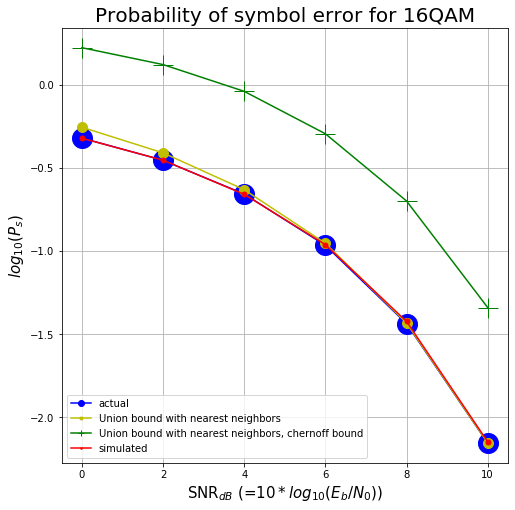

In [32]:
QAM16_Ps_actual_log = np.log10(QAM16_probab_symb_err(N0_arr))
QAM16_Ps_ub_log = np.log10(QAM16_union_bound(N0_arr))

plt.figure(2,figsize=(8,8))
plt.plot(Eb_by_N0_dB, QAM16_Ps_actual_log,'-bo',markersize=20,label='actual')
plt.plot(Eb_by_N0_dB, QAM16_Ps_ub_log[0],'-yo',markersize=10,label='Union bound with nearest neighbors')
plt.plot(Eb_by_N0_dB, QAM16_Ps_ub_log[1],'-g+',markersize=20,label='Union bound with nearest neighbors, chernoff bound')
plt.plot(Eb_by_N0_dB, np.log10(SER_arr2),'-ro',markersize=5,label='simulated')
plt.legend(markerscale=0.3)
plt.title('Probability of symbol error for 16QAM',size=20)
plt.xlabel('SNR$_{dB}$ (=$10*log_{10}(E_b/N_0)$)',size=15)
plt.ylabel('$log_{10}(P_s)$',size=15)
plt.grid()
plt.show

### Comments:
The simulated SER matches the theoretical values perfectly.

## (f)
## BER for QPSK and 16-QAM with and without gray mapping
### QPSK:

In [33]:
b_QPSK_trans_gray   = -1*np.ones((num_sym,2))
b_QPSK_trans_nogray = -1*np.ones((num_sym,2))
b_QPSK_dec_gray     = -1*np.ones((6,num_sym,2))
b_QPSK_dec_nogray   = -1*np.ones((6,num_sym,2))

#Symbol to bit mappings definitions can be observed by looking at same index elements:
symbols     = [ [-1,-1], [-1, 1], [ 1, 1], [ 1,-1] ]
bits_gray   = [ [ 0, 0], [ 0, 1], [ 1, 1], [ 1, 0] ]
bits_nogray = [ [ 0, 0], [ 0, 1], [ 1, 0], [ 1, 1] ]

#Mapping the actual symbols to bits
for i in range(4):
    #Mapping the transmitted symbols to bits
    b_QPSK_trans_gray[  np.all(sym_trans==symbols[i],axis=1)] = bits_gray[i]
    b_QPSK_trans_nogray[np.all(sym_trans==symbols[i],axis=1)] = bits_nogray[i]
    
    #Mapping the decided symbols from received ones to bits
    b_QPSK_dec_gray[  np.all(sym_dec_arr==symbols[i],axis=2)] = bits_gray[i]
    b_QPSK_dec_nogray[np.all(sym_dec_arr==symbols[i],axis=2)] = bits_nogray[i]

b_QPSK_trans_gray   = b_QPSK_trans_gray.reshape(2*num_sym) #Flattening the num_sym*2 array to 1*(2num_sym)
b_QPSK_trans_nogray = b_QPSK_trans_nogray.reshape(2*num_sym)
b_QPSK_dec_gray     = b_QPSK_dec_gray.reshape(len(N0_arr),2*num_sym) #Flattening each of the 6 num_sym*2 arrays to 1*(2num_sym)
b_QPSK_dec_nogray   = b_QPSK_dec_nogray.reshape(len(N0_arr),2*num_sym)

#Calculating BER:
BER_QPSK_gray_arr   = 1 - np.count_nonzero( b_QPSK_dec_gray   == b_QPSK_trans_gray,   axis=1)/(2*num_sym)
BER_QPSK_nogray_arr = 1 - np.count_nonzero( b_QPSK_dec_nogray == b_QPSK_trans_nogray, axis=1)/(2*num_sym)

print('BER_QPSK_gray_arr = ', BER_QPSK_gray_arr)
print('BER_QPSK_nogray_arr = ', BER_QPSK_nogray_arr)

BER_QPSK_gray_arr =  [7.8360e-02 3.7535e-02 1.2580e-02 2.4500e-03 1.7000e-04 5.0000e-06]
BER_QPSK_nogray_arr =  [1.1099e-01 5.4590e-02 1.8880e-02 3.6600e-03 2.5000e-04 5.0000e-06]


### 16-QAM

In [34]:
b_16QAM_trans_gray   = -1*np.ones((num_sym2,4))
b_16QAM_trans_nogray = -1*np.ones((num_sym2,4))
b_16QAM_dec_gray     = -1*np.ones((6,num_sym2,4))
b_16QAM_dec_nogray   = -1*np.ones((6,num_sym2,4))

a = 0.4**0.5

# x coord of symbol to bit mapping definitions
symbols2_x     = a*np.array([ -3,   -1,    1,    3])
bits_gray2_x   =            [[0,0],[0,1],[1,1],[1,0]]
bits_nogray2_x =            [[0,0],[0,1],[1,0],[1,1]]

# y coord of symbol to bit mapping definitions
symbols2_y     = a*np.array([ -3,   -1,    1,    3])
bits_gray2_y   =            [[0,0],[0,1],[1,1],[1,0]]
bits_nogray2_y =            [[0,0],[0,1],[1,0],[1,1]]

#Mapping the actual symbols to bits
for i in range(4):
    for j in range(4):
        cond_sym_trans = np.all(sym_trans2/a == [ symbols2_x[i]/a, symbols2_y[j]/a ], axis=1)
        b_16QAM_trans_gray[cond_sym_trans]   = bits_gray2_x[i]   + bits_gray2_y[j]
        b_16QAM_trans_nogray[cond_sym_trans] = bits_nogray2_x[i] + bits_nogray2_y[j]
        
        cond_sym_dec = np.all(sym_dec_arr2/a == [ symbols2_x[i]/a, symbols2_y[j]/a ], axis=2)
        b_16QAM_dec_gray[cond_sym_dec]   = bits_gray2_x[i]   + bits_gray2_y[j]
        b_16QAM_dec_nogray[cond_sym_dec] = bits_nogray2_x[i] + bits_nogray2_y[j]

#Flattening:
b_16QAM_trans_gray   = b_16QAM_trans_gray.reshape(4*num_sym2)
b_16QAM_trans_nogray = b_16QAM_trans_nogray.reshape(4*num_sym2)
b_16QAM_dec_gray     = b_16QAM_dec_gray.reshape(len(N0_arr),4*num_sym2)
b_16QAM_dec_nogray   = b_16QAM_dec_nogray.reshape(len(N0_arr),4*num_sym2)

#Calculating BER
BER_16QAM_gray_arr   = 1 - np.count_nonzero( b_16QAM_dec_gray   == b_16QAM_trans_gray,   axis=1)/(4*num_sym2)
BER_16QAM_nogray_arr = 1 - np.count_nonzero( b_16QAM_dec_nogray == b_16QAM_trans_nogray, axis=1)/(4*num_sym2)

print('BER_16QAM_gray_arr = ', BER_16QAM_gray_arr)
print('BER_16QAM_nogray_arr = ', BER_16QAM_nogray_arr)

BER_16QAM_gray_arr =  [0.1408075 0.0979225 0.0582425 0.02814   0.00953   0.00179  ]
BER_16QAM_nogray_arr =  [0.184335  0.1301475 0.0774925 0.03729   0.012695  0.0023875]


## Figure 2.4

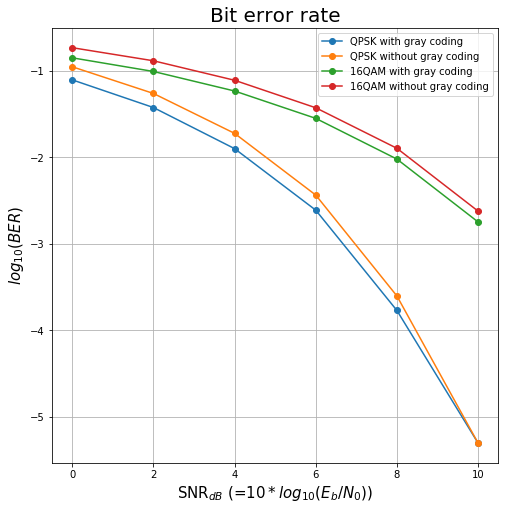

In [35]:
plt.figure(figsize=(8,8))
plt.plot(Eb_by_N0_dB, np.log10(BER_QPSK_gray_arr),'-o',label='QPSK with gray coding')
plt.plot(Eb_by_N0_dB, np.log10(BER_QPSK_nogray_arr),'-o',label='QPSK without gray coding')
plt.plot(Eb_by_N0_dB, np.log10(BER_16QAM_gray_arr),'-o',label='16QAM with gray coding')
plt.plot(Eb_by_N0_dB, np.log10(BER_16QAM_nogray_arr),'-o',label='16QAM without gray coding')
plt.legend()
plt.title('Bit error rate',size=20)
plt.xlabel('SNR$_{dB}$ (=$10*log_{10}(E_b/N_0)$)',size=15)
plt.ylabel('$log_{10}(BER)$',size=15)
plt.grid()
plt.show()

### Comments:
- The BER is lower for gray coding for both cases

In [36]:
print('BER_QPSK_gray_arr/QPSK_SER = ', BER_QPSK_gray_arr/SER_arr)
print('BER_QPSK_nogray_arr/QPSK_SER = ', BER_QPSK_nogray_arr/SER_arr)

BER_QPSK_gray_arr/QPSK_SER =  [0.52170439 0.51102791 0.5032     0.5        0.5        0.5       ]
BER_QPSK_nogray_arr/QPSK_SER =  [0.73894807 0.74322668 0.7552     0.74693878 0.73529412 0.5       ]


- The ratio of BER with gray coding and SER for QPSK is 0.5, as shown above. This makes sense, because for every incorrect symbol which has been decoded as one of it's neighbors, there is one correct and one incorrect bit in gray coding, and hence, BER is half of SER. The ratio is closer to 0.5 for lower noise variance, because the probability of being incorrectly decoded as not one of the neighbors drops significantly.

In [37]:
print('BER_16-QAM_gray_arr/16QAM_SER = ', BER_16QAM_gray_arr/SER_arr2)
print('BER_16-QAM_nogray_arr/16QAM_SER = ', BER_16QAM_nogray_arr/SER_arr2)

BER_16-QAM_gray_arr/16QAM_SER =  [0.29465033 0.27781009 0.26514841 0.25696283 0.25238347 0.25105189]
BER_16-QAM_nogray_arr/16QAM_SER =  [0.38573491 0.36923372 0.35278385 0.34051685 0.33620233 0.33485273]


- Similarly for gray coding in 16-QAM, the ratio is 0.25, more accurately so for lower noise variance, as shown above.